In [1]:
from detectron2.data import DatasetCatalog,MetadataCatalog
from plain_train_net import grab_dataset,OutputVis, CreatePlotsRPD
from detectron2.utils.colormap import random_color

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset_name = "test"
has_annotations=True
dfimg = pd.read_csv('output_test/dfimg_test.csv',index_col=0)
dfvol = dfimg.groupby(['ptid','eye']).sum()
vols = dfvol[dfvol.dt_instances>=5].index
grps = dfimg[dfimg.set_index(['ptid','eye']).index.isin(vols)].groupby(['ptid','eye'])
#spacing
D = 5760 #um
d = D/48 #um scan spacing

P = 1024 #px scan width in pixels = D
dpx = d*P/D #px scan spacing in pixels

In [2]:
dataset_name = "dfeval_train_v2"
has_annotations = False
dfimg = pd.read_csv('output_dfeval_train_v2/dfimg_dfeval_train_v2.csv',index_col=0)
dfvol = dfimg.groupby(['volID']).sum()
vols = dfvol[dfvol.dt_instances>=20].index
grps = dfimg[dfimg.volID.isin(vols)].groupby(['volID'])
#spacing
D = 5760 #um
d = D/60 #um scan spacing

P = 768 #px scan width in pixels = D
dpx = d*P/D #px scan spacing in pixels

In [3]:

DatasetCatalog.register(dataset_name, grab_dataset(dataset_name))
MetadataCatalog.get(dataset_name).thing_classes = [""]

## Example for ARVO 2022

In [ ]:
vis =OutputVis(dataset_name,pred_mode='file',pred_file = 'output_test/coco_instances_results.json')
gt,dt = vis.get_image('101109_OD_oct-033.png')
ori = vis.get_ori_image('101109_OD_oct-033.png')
from PIL import Image
hcrange = list(vis.height_crop_range(np.array(ori.convert('L')),height_target=256*3))

im = Image.fromarray(np.concatenate((np.array(ori.convert('RGB'))[hcrange,:],np.array(gt)[hcrange,:],np.array(dt)[hcrange])))
im.save('output_test/101109_OD_oct-033.jpg')

## En face instance visualization

In [ ]:

# vis =OutputVis(dataset_name,pred_mode='file',pred_file = 'output_test/coco_instances_results.json')
# name = (101109,'OD')
# imageids = grps.get_group(name).sort_index().index
#vis.output_all_to_tiff(imageids,'output_test/101109_OD.tiff')
#vis.output_to_pdf(imageids,'output_test/101109_OD.png',grps.get_group(name).sort_index())

In [6]:
vis =OutputVis(dataset_name,pred_mode='file',pred_file = 'output_'+dataset_name+'/coco_instances_results.json',has_annotations=has_annotations)
def mygen(grps):
    for name,grp in grps:
        grp = grps.get_group(name).sort_index()
        yield vis.compare_enface(grp,name,496,P,dpx)
  

gen = mygen(grps)

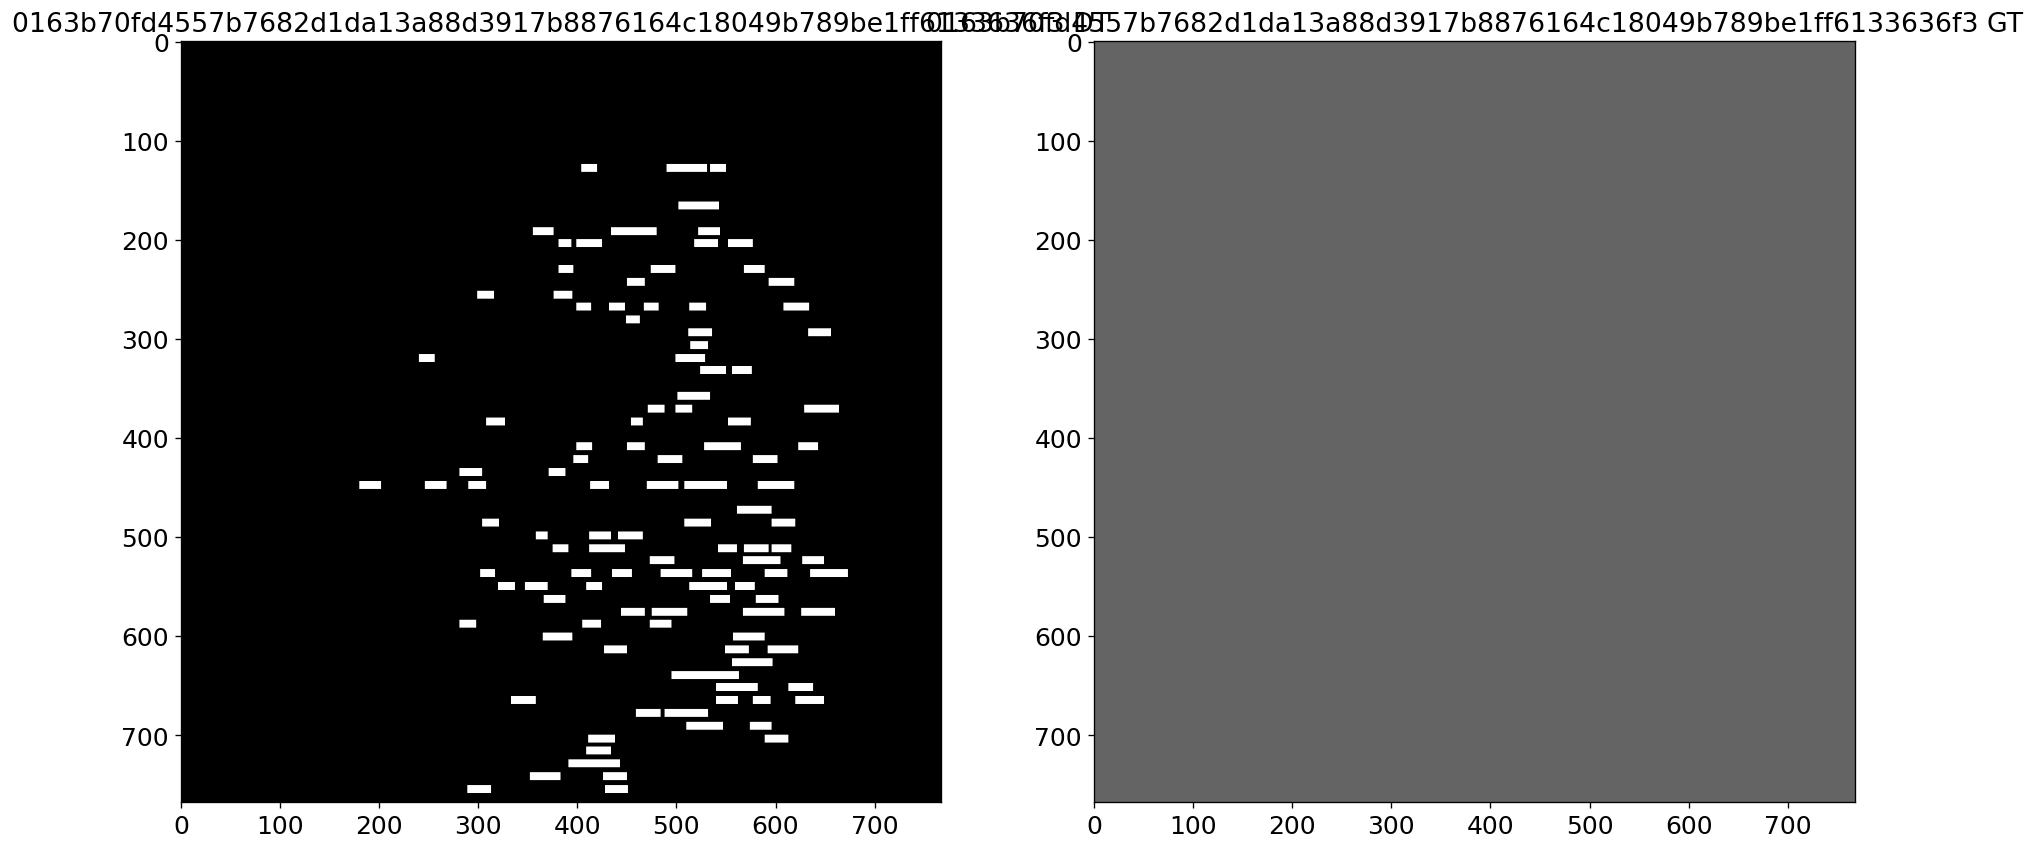

In [7]:
fig, ax = next(gen)

In [ ]:
# from PIL import Image
# dt = ax[0].get_images()[0].get_array()
# gt = ax[1].get_images()[0].get_array()
# ax[0].get_title()

# Image.fromarray(dt).save('output_test/'+ax[0].get_title()+'.tiff')
# Image.fromarray(gt).save('output_test/'+ax[1].get_title()+'.tiff')

In [ ]:
name = '477daf788b31a095c03f5846a5e738dc4800bd8a6679e301b68c051505648b8d'
imageids = grps.get_group(name).sort_index().index
#vis.output_pred_to_tiff(imageids,'output_'+dataset_name+'/'+name+'.tiff')
#vis.output_all_to_tiff(imageids,'output_test/101109_OD.tiff')
vis.output_to_pdf(imageids,'output_'+dataset_name+'/'+name+'.pdf',grps.get_group(name).sort_index())

# Longitudnal Study #

In [19]:

dfdata = pd.read_parquet('datasets/dfeval_train_v2_refined.parquet')
dfdata[(dfdata.instance.isin(vols))&(dfdata.slicei==0)].groupby(['ptid','eye']).count()

In [44]:
vols_L = dfdata[(dfdata.ptid=='477daf788b31a095c03f5846a5e738dc4800bd8a6679e301b68c051505648b8d')&(dfdata.eye=='L')][['instance','age']].drop_duplicates()
vols_R = dfdata[(dfdata.ptid=='477daf788b31a095c03f5846a5e738dc4800bd8a6679e301b68c051505648b8d')&(dfdata.eye=='R')][['instance','age']].drop_duplicates()

In [77]:
grps_L = dfimg.reset_index().merge(vols_L, left_on='volID',right_on='instance').set_index('index').drop(columns=['instance']).groupby(['age'])
grps_R = dfimg.reset_index().merge(vols_R, left_on='volID',right_on='instance').set_index('index').drop(columns=['instance']).groupby(['age'])

In [78]:
gen = mygen(grps_R)

In [85]:
fig, ax = next(gen)

StopIteration: 